# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

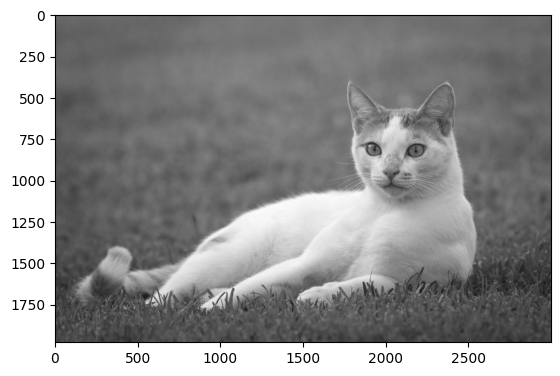

In [4]:
img = cv2.imread('/content/cat_image.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')

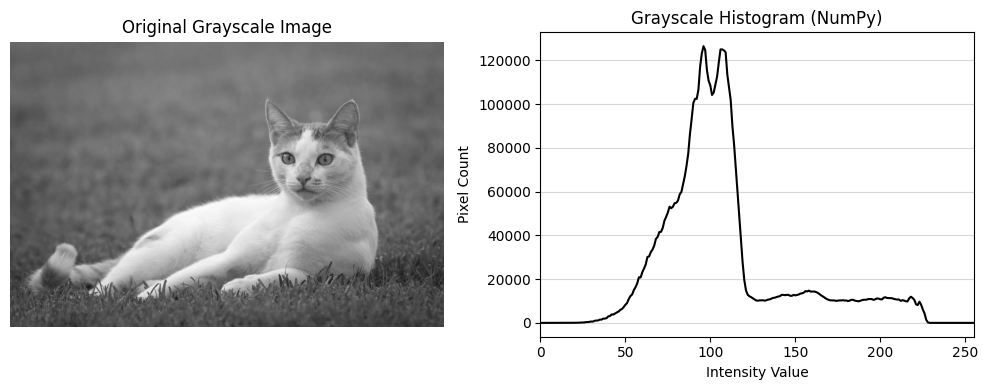

In [5]:
def gray_histogram(gray_img):
  hist=np.zeros(256)
  flat_img=gray_img.flatten()
  for i in range(len(flat_img)):
    hist[flat_img[i]]+=1
  return hist

hist_gray = gray_histogram(img_gray)

# Plot using matplotlib
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_gray, color='black')
plt.title('Grayscale Histogram (NumPy)')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 255])
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

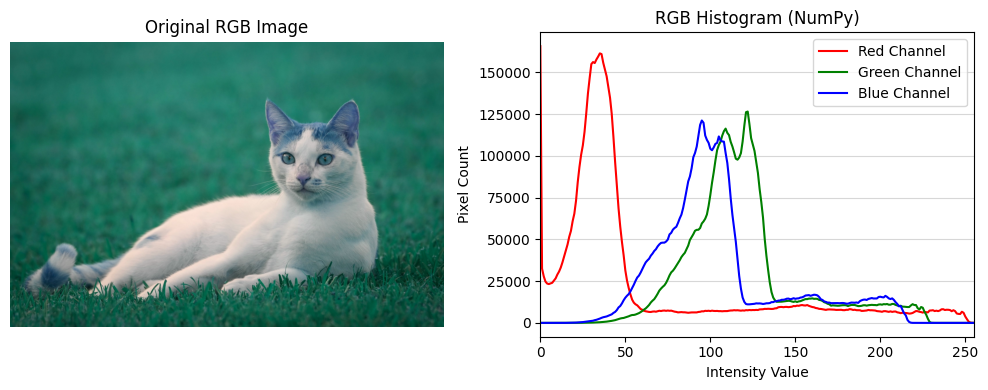

In [6]:
def rgb_histogram(rgb_img):
    R = rgb_img[..., 0]
    G = rgb_img[..., 1]
    B = rgb_img[..., 2]

    hist_R = gray_histogram(R)
    hist_G = gray_histogram(G)
    hist_B = gray_histogram(B)

    return hist_R, hist_G, hist_B

hist_R, hist_G, hist_B = rgb_histogram(img)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist_R, color='red', label='Red Channel')
plt.plot(hist_G, color='green', label='Green Channel')
plt.plot(hist_B, color='blue', label='Blue Channel')
plt.title('RGB Histogram (NumPy)')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 255])
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

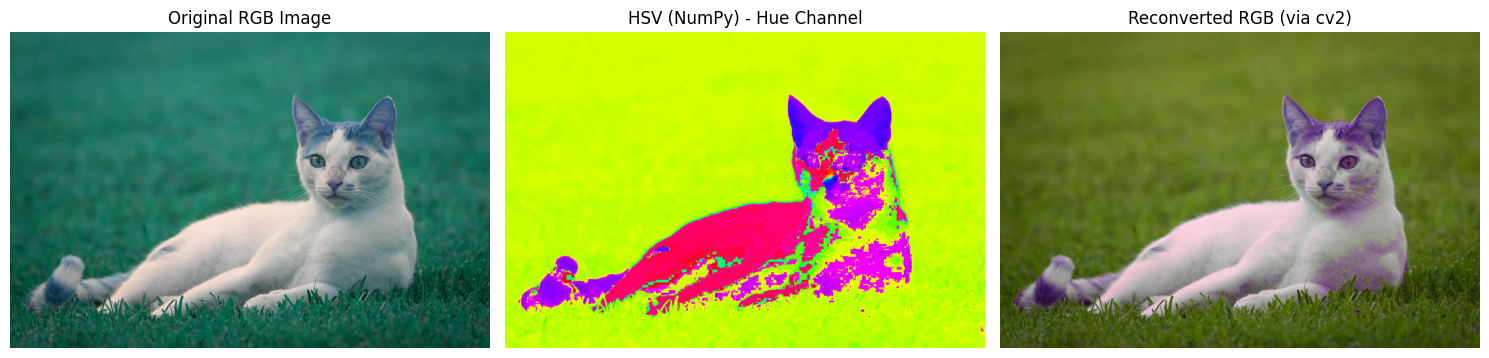

In [21]:
def rgb_to_hsv(rgb_img):

    img_float = rgb_img.astype(np.float32) / 255.0
    R, G, B = img_float[..., 0], img_float[..., 1], img_float[..., 2]
    V = np.max(img_float, axis=2)
    Min = np.min(img_float, axis=2)
    C = V - Min

    S = np.zeros_like(V)
    mask_c = C != 0
    S = np.where(V != 0, C / V, 0)
    H = np.zeros_like(V)
    C_safe = np.where(mask_c, C, 1.0)

    R_prime_calc = (V - R) / C_safe
    G_prime_calc = (V - G) / C_safe
    B_prime_calc = (V - B) / C_safe

    R_prime = np.where(mask_c, R_prime_calc, 0)
    G_prime = np.where(mask_c, G_prime_calc, 0)
    B_prime = np.where(mask_c, B_prime_calc, 0)

    mask_r = np.logical_and(mask_c, V == R)
    H = np.where(mask_r, 60 * (G_prime - B_prime), H)


    mask_g = np.logical_and(mask_c, V == G)
    H = np.where(mask_g, 60 * (2 + B_prime - R_prime), H)

    mask_b = np.logical_and(mask_c, V == B)
    H = np.where(mask_b, 60 * (4 + R_prime - G_prime), H)
    H = np.where(H < 0, H + 360, H)

    H_scaled = (H / 2.0)
    S_scaled = S * 255.0
    V_scaled = V * 255.0

    hsv_img = np.stack((H_scaled, S_scaled, V_scaled), axis=2)
    return np.round(hsv_img).astype(np.uint8)


img_hsv_numpy = rgb_to_hsv(img)
img_reconverted_rgb = cv2.cvtColor(img_hsv_numpy, cv2.COLOR_HSV2RGB)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 3, 2)
# Display Hue channel (normalized 0-179)
plt.imshow(img_hsv_numpy[..., 0], cmap='hsv', vmin=0, vmax=179)
plt.title('HSV (NumPy) - Hue Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_reconverted_rgb)
plt.title('Reconverted RGB (via cv2)')
plt.axis('off')

plt.tight_layout()
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [8]:
def rainforest_haze_filter(img_rgb):

    img_float = img_rgb.astype(np.float32) / 255.0

    # 1. Gamma Correction (Contrast Adjustment) - Boosting contrast/darkening
    gamma = 1.3 # Value > 1 darkens midtones/shadows and increases contrast
    # Implementation: output = input ^ (1/gamma)
    # np.power is used for the power function
    img_gamma = np.power(img_float, 1.0 / gamma)

    R, G, B = img_gamma[..., 0], img_gamma[..., 1], img_gamma[..., 2]
    B_tinted = B + 0.15
    G_tinted = G + 0.05
    R_tinted = R - 0.05


    img_tinted = np.stack([R_tinted, G_tinted, B_tinted], axis=2)
    img_tinted = np.clip(img_tinted, 0.0, 1.0)

    img_final = (img_tinted * 255).astype(np.uint8)

    return img_final

# Note for the filter design:
# 1. Why I chose those modifications: Gamma correction was chosen to deepen the shadows
#    and mid-tones, creating a sense of density and drama typical of a dark forest.
#    The blue and cyan tint was added to simulate the cool, moist atmosphere and
#    haze often found in rainforests.
# 2. Why they suit the image: This filter is best suited for images with lush greens
#    and shadows (like rainforests or landscapes) as it enhances the foliage contrast
#    and adds a desirable color mood.

# Example usage (You must choose an appropriate image for this)
# img_filter1_output = rainforest_haze_filter(img_rgb)

In [10]:
def desert_sun_filter(img_rgb):

    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    H, S, V = img_hsv[..., 0], img_hsv[..., 1], img_hsv[..., 2]
    vibrance_factor = 0.5 * (1 - V / 255.0)
    S_boosted = np.clip(S + (S * vibrance_factor), 0, 255)

    img_hsv_vibrance = np.stack([H, S_boosted, V], axis=2)
    # Convert back to RGB
    img_vibrance_rgb = cv2.cvtColor(img_hsv_vibrance.astype(np.uint8), cv2.COLOR_HSV2RGB)

    img_float = img_vibrance_rgb.astype(np.float32) / 255.0
    R, G, B = img_float[..., 0], img_float[..., 1], img_float[..., 2]
    L = 0.299 * R + 0.587 * G + 0.114 * B

    shadow_mask = np.clip((0.5 - L) * 2, 0, 1) # Strongest in shadows (L near 0)
    highlight_mask = np.clip((L - 0.5) * 2, 0, 1) # Strongest in highlights (L near 1)

    R_shadow = R * (1 - shadow_mask) + 0.1 * shadow_mask
    G_shadow = G * (1 - shadow_mask) + 0.1 * shadow_mask
    B_shadow = B * (1 - shadow_mask) + 0.5 * shadow_mask

    R_final = R_shadow * (1 - highlight_mask) + 0.9 * highlight_mask
    G_final = G_shadow * (1 - highlight_mask) + 0.45 * highlight_mask
    B_final = B_shadow * (1 - highlight_mask) + 0.1 * highlight_mask

    img_split_tone = np.stack([R_final, G_final, B_final], axis=2)
    img_final = (np.clip(img_split_tone, 0.0, 1.0) * 255).astype(np.uint8)

    return img_final

# Note for the filter design:
# 1. Why I chose those modifications: The vibrance boost was selected to enhance
#    the subtle colors in the scene (like sand or sparse vegetation) without oversaturating
#    already bright colors. Split-toning with orange highlights and blue shadows is a
#    classic cinematic technique to emphasize harsh, warm sunlight and deep, cool shadows,
#    perfect for a desert scene.
# 2. Why they suit the image: This filter is excellent for images captured in bright,
#    harsh light conditions (like deserts, beaches, or sunsets) to create depth and a
#    dramatic color palette.


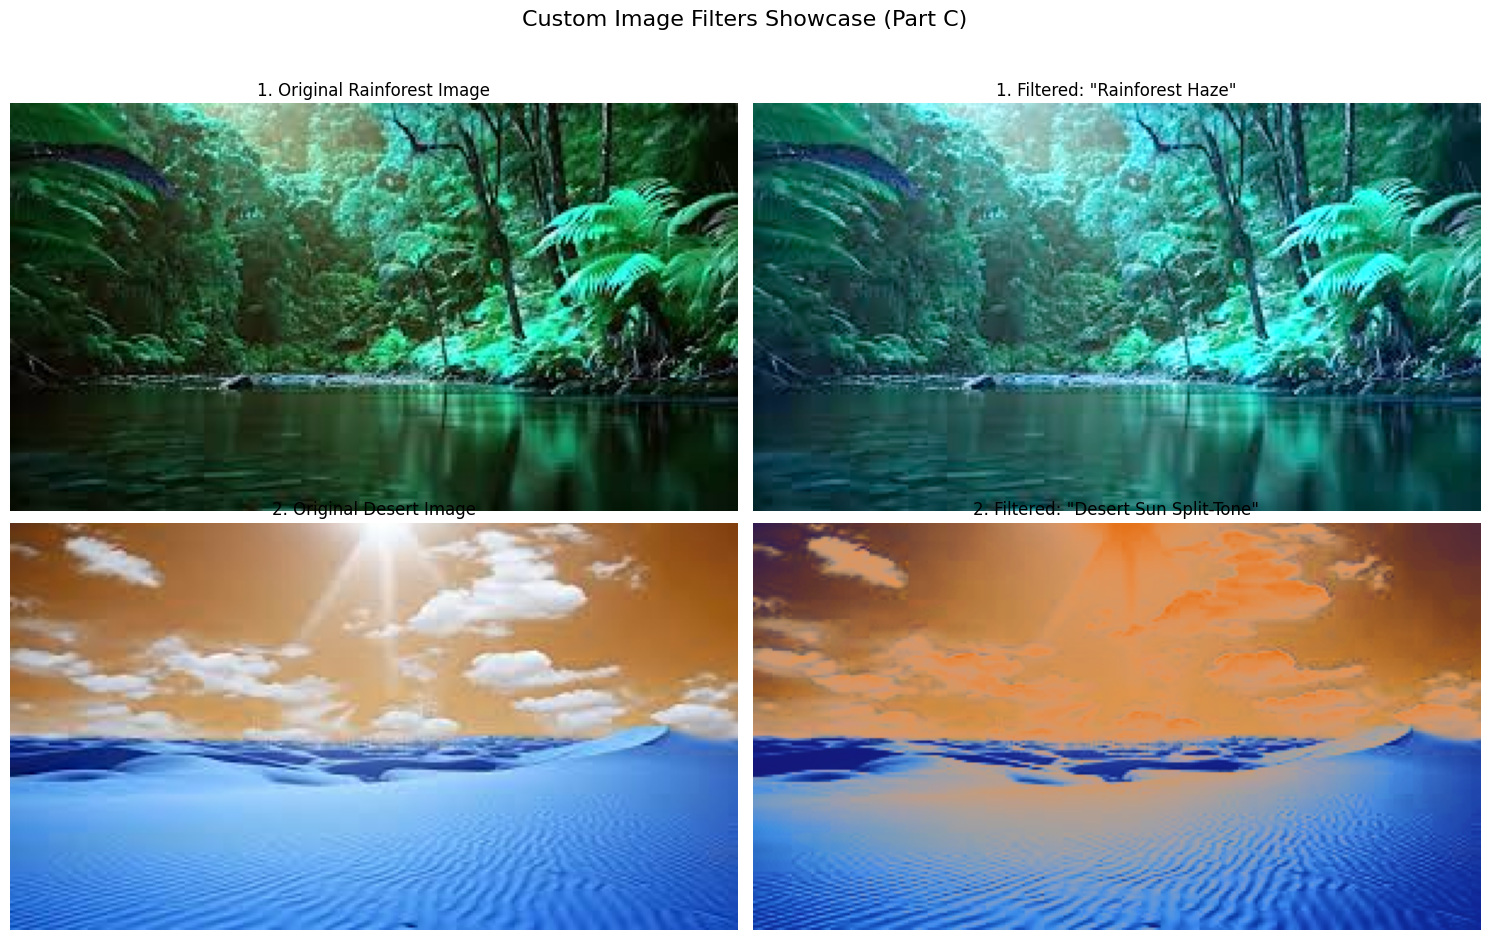

In [12]:
# Apply the filters to the appropriate images
img_rgb_rainforest = cv2.imread("/content/rainforest_image.jpeg")
img_rgb_desert = cv2.imread("/content/desert_image.jpeg")
img_filter1_output = rainforest_haze_filter(img_rgb_rainforest)
img_filter2_output = desert_sun_filter(img_rgb_desert)


plt.figure(figsize=(15, 10))
plt.suptitle("Custom Image Filters Showcase (Part C)", fontsize=16)


plt.subplot(2, 2, 1)
plt.imshow(img_rgb_rainforest)
plt.title('1. Original Rainforest Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_filter1_output)
plt.title('1. Filtered: "Rainforest Haze"')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_rgb_desert)
plt.title('2. Original Desert Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_filter2_output)
plt.title('2. Filtered: "Desert Sun Split-Tone"')
plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

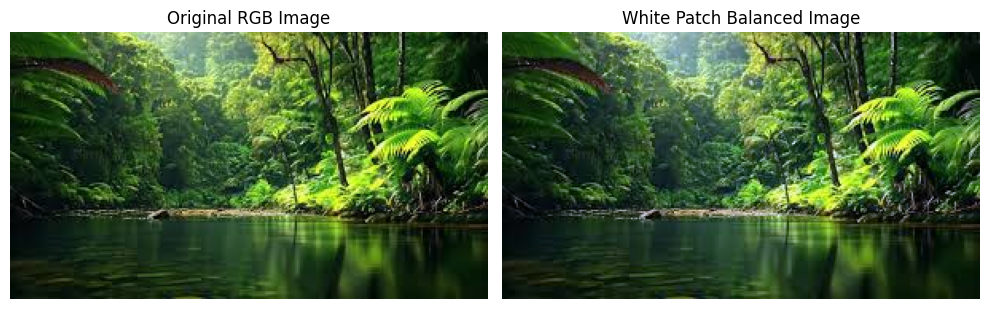

In [19]:
dog_img=cv2.imread('/content/rainforest_image.jpeg')
dog_image = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
def white_patch_balance(img_rgb):

    img_float = img_rgb.astype(np.float32)
    max_R = np.max(img_float[..., 0])
    max_G = np.max(img_float[..., 1])
    max_B = np.max(img_float[..., 2])

    max_R = np.clip(max_R, 1, 255)
    max_G = np.clip(max_G, 1, 255)
    max_B = np.clip(max_B, 1, 255)

    target = 255.0

    scale_R = target / max_R
    scale_G = target / max_G
    scale_B = target / max_B

    R_balanced = img_float[..., 0] * scale_R
    G_balanced = img_float[..., 1] * scale_G
    B_balanced = img_float[..., 2] * scale_B

    img_balanced_float = np.stack([R_balanced, G_balanced, B_balanced], axis=2)
    img_balanced = np.clip(img_balanced_float, 0, 255).astype(np.uint8)

    return img_balanced

# Apply the white balance function
img_balanced = white_patch_balance(dog_img)
img_new = cv2.cvtColor(img_balanced, cv2.COLOR_BGR2RGB)
# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog_image)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_new)
plt.title('White Patch Balanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

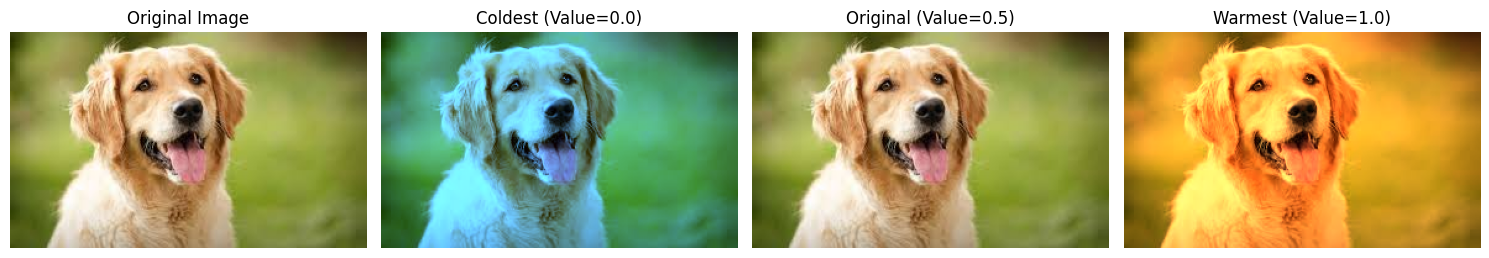

In [20]:
def white_balance_slider(img_rgb, value):

    if not (0.0 <= value <= 1.0):
        raise ValueError("Value must be between 0.0 and 1.0")

    img_float = img_rgb.astype(np.float32)
    cold_factor = 2.0 * (0.5 - value)
    warm_factor = 2.0 * (value - 0.5)

    R_multiplier = 1.0 + warm_factor * 0.5
    B_multiplier = 1.0 + cold_factor * 0.5

    R_processed = img_float[..., 0] * R_multiplier
    G_processed = img_float[..., 1]
    B_processed = img_float[..., 2] * B_multiplier

    img_processed_float = np.stack([R_processed, G_processed, B_processed], axis=2)
    img_processed = np.clip(img_processed_float, 0, 255).astype(np.uint8)

    return img_processed

value_cold = 0.0
value_original = 0.5
value_warm = 1.0

dog_new = cv2.imread("/content/dog image.jpeg")
dog_final = cv2.cvtColor(dog_new, cv2.COLOR_BGR2RGB)
img_cold = white_balance_slider(dog_final, value_cold)
img_original = white_balance_slider(dog_final, value_original) # Should be identical to original
img_warm = white_balance_slider(dog_final, value_warm)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(dog_final)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_cold)
plt.title(f'Coldest (Value={value_cold})')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_original)
plt.title(f'Original (Value={value_original})')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_warm)
plt.title(f'Warmest (Value={value_warm})')
plt.axis('off')

plt.tight_layout()
plt.show()